In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.drop(labels='Serial No.',inplace=True,axis=1) #Dropped S.No column because it has no purpose for us

In [6]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
df.columns #Copy here for avoiding spelling mistakes

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [9]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [10]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [11]:
df['Research'].unique()

array([1, 0], dtype=int64)

In [12]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# We have no missing values here.

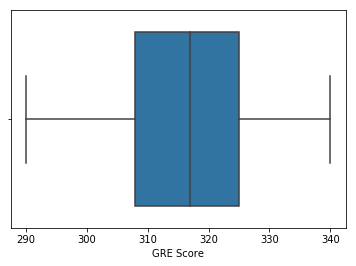

In [15]:
import seaborn as sns
sns.boxplot(x=df['GRE Score'])

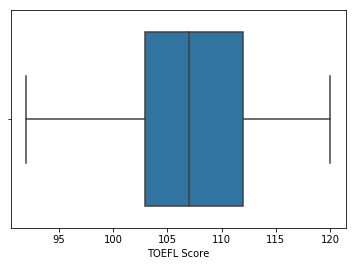

In [16]:
sns.boxplot(x=df['TOEFL Score'])

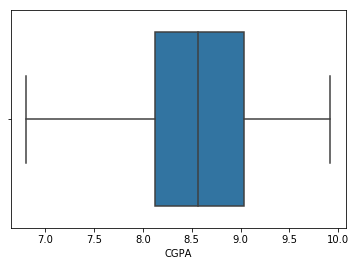

In [17]:
sns.boxplot(x=df['CGPA'])

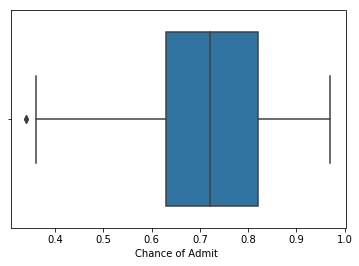

In [18]:
sns.boxplot(x=df['Chance of Admit '])

# As we can observe that There are no Outliers Except in Chance of Admit, But it is also negligible. So There's no worry of outliers 

In [19]:
x=df.iloc[:,:7].values

In [20]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [21]:
y=df.iloc[:,7:8].values

In [22]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
a0=min(x_train[:,0])
a1=min(x_train[:,1])
a2=min(x_train[:,2])
a3=min(x_train[:,3])
a4=min(x_train[:,4])
a5=min(x_train[:,5])
a6=min(x_train[:,6])

In [25]:
b0=max(x_train[:,0])
b1=max(x_train[:,1])
b2=max(x_train[:,2])
b3=max(x_train[:,3])
b4=max(x_train[:,4])
b5=max(x_train[:,5])
b6=max(x_train[:,6])

In [26]:
a0,a1,a2,a3,a4,a5,a6

(290.0, 92.0, 1.0, 1.0, 1.0, 6.8, 0.0)

In [27]:
b0,b1,b2,b3,b4,b5,b6

(340.0, 120.0, 5.0, 5.0, 5.0, 9.92, 1.0)

# Scaling Our Data

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
x_train

array([[0.96      , 0.89285714, 0.75      , ..., 0.875     , 0.8525641 ,
        1.        ],
       [0.58      , 0.64285714, 0.5       , ..., 0.375     , 0.63782051,
        0.        ],
       [0.92      , 0.71428571, 1.        , ..., 1.        , 0.94871795,
        1.        ],
       ...,
       [0.        , 0.42857143, 0.75      , ..., 0.375     , 0.21153846,
        0.        ],
       [0.98      , 0.96428571, 1.        , ..., 0.75      , 0.92948718,
        0.        ],
       [0.64      , 0.64285714, 0.75      , ..., 1.        , 0.74679487,
        1.        ]])

In [30]:
x_test

array([[0.53488372, 0.45833333, 0.25      , 0.75      , 0.71428571,
        0.25670498, 1.        ],
       [0.60465116, 0.79166667, 0.75      , 0.75      , 1.        ,
        0.7164751 , 0.        ],
       [0.60465116, 0.66666667, 0.5       , 0.375     , 0.42857143,
        0.63218391, 1.        ],
       [0.76744186, 0.875     , 1.        , 0.875     , 1.        ,
        0.70114943, 1.        ],
       [0.13953488, 0.29166667, 0.5       , 0.375     , 0.14285714,
        0.33716475, 1.        ],
       [0.44186047, 0.41666667, 0.5       , 0.625     , 0.28571429,
        0.40229885, 0.        ],
       [0.06976744, 0.25      , 0.25      , 0.125     , 0.14285714,
        0.23371648, 0.        ],
       [0.1627907 , 0.625     , 0.5       , 0.75      , 0.85714286,
        0.4789272 , 0.        ],
       [0.04651163, 0.20833333, 0.        , 0.125     , 0.14285714,
        0.24904215, 0.        ],
       [0.6744186 , 0.41666667, 0.5       , 0.5       , 0.71428571,
        0.57471264, 0. 

In [31]:
y_train=(y_train>0.5)

In [32]:
y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [33]:
y_test=(y_test>0.5)

In [34]:
y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(x_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
#Predicting on Test and Train
y_pred = nb.predict(x_test)  #for test
y_pred

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False])

In [37]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
print(confusion_matrix(y_test,y_pred)) 


Accuracy score: 66.000000
Recall score : 63.829787
ROC score : 81.914894

[[ 6  0]
 [34 60]]


# Logistic Regression

In [38]:
from sklearn.linear_model.logistic import LogisticRegression

In [39]:
cls =LogisticRegression(random_state =0)

lr=cls.fit(x_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
y_pred =lr.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [41]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
print(confusion_matrix(y_test,y_pred)) 


Accuracy score: 91.000000
Recall score : 94.680851
ROC score : 64.007092

[[ 2  4]
 [ 5 89]]


# Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
y_pred =rf_model.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [44]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
print(confusion_matrix(y_test,y_pred)) 


Accuracy score: 87.000000
Recall score : 89.361702
ROC score : 69.680851

[[ 3  3]
 [10 84]]


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
y_pred =dtc.predict(x_test)
y_pred

array([False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True])

In [47]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
print(confusion_matrix(y_test,y_pred)) 


Accuracy score: 77.000000
Recall score : 76.595745
ROC score : 79.964539

[[ 5  1]
 [22 72]]


# Logistic Regression has a good accuracy score

In [48]:
min1=[a0,a1,a2,a3,a4,a5,a6]
max1=[b0,b1,b2,b3,b4,b5,b6]

In [49]:
min1,max1

([290.0, 92.0, 1.0, 1.0, 1.0, 6.8, 0.0],
 [340.0, 120.0, 5.0, 5.0, 5.0, 9.92, 1.0])